In [1]:
import torchvision as thv
import numpy as np
import matplotlib.pyplot as plt
import copy

(a) Prepare Dataset

In [2]:
def subsample(dataset):
    X = dataset.data.numpy()
    # flatten X and change type
    X = X.reshape(X.shape[0], -1).astype(np.float32)
    Y = np.array(dataset.targets)

    indices = []
    for label in range(2):
        label_indices = np.argwhere(Y == label)
        indices.extend(label_indices)

    indices = np.array(indices).reshape(-1)
    np.random.shuffle(indices)
    sampled_X = X[indices]
    sampled_Y = Y[indices]

    # normalize x and add ones
    sampled_X = sampled_X / 255.0
    sampled_X = np.concatenate([np.ones([sampled_X.shape[0], 1]), sampled_X], axis=1)

    # relabel Y
    sampled_Y[sampled_Y == 1.0] = -1.0
    sampled_Y[sampled_Y == 0.0] = 1.0
    sampled_Y = sampled_Y.reshape(-1, 1)
    
    return sampled_X, sampled_Y

(b) Logistic Regression

In [3]:
def process(mode='GD'):
    np.random.seed(1)
    lmd = 0.0001
    lr = 0.0005
    num_iter = 100
    rho = 0.80

    # load dataset
    train = thv.datasets.MNIST('./', download=True, train=True)
    val = thv.datasets.MNIST('./', download=True, train=False)
    trainX, trainY = subsample(dataset=train)
    valX, valY = subsample(dataset=val)

    W = np.random.normal(loc=0.0, scale=1.0, size=[28*28+1, 1])
    W_old = copy.deepcopy(W)

    train_losses, val_losses = [], []
    for iter in range(num_iter):
        exp = np.exp(-trainY * np.matmul(trainX, W))
        train_loss = np.mean(np.log(1 + exp), axis=0) + (lmd * (sum(W ** 2)) / 2)
        val_loss = np.mean(np.log(1 + np.exp(-valY * np.matmul(valX, W))), axis=0) + (lmd * (sum(W ** 2)) / 2)
        if mode == 'NAG':
            momentum = (1 + rho) * W - rho * W_old
            n_exp = np.exp(-trainY * np.matmul(trainX, momentum))
            train_grad = -(trainX.T.dot(trainY * n_exp / (1 + n_exp)))//trainX.shape[0] + lmd * momentum
            W_old = copy.deepcopy(W)
            W = momentum - lr * train_grad
        elif mode == 'GD':
            train_grad = -(trainX.T.dot(trainY * exp / (1 + exp)))//trainX.shape[0] + lmd * W
            W = W - lr * train_grad

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(iter, train_loss, val_loss)

    return train_losses, val_losses

Gradient Descent

In [4]:
train_losses_gd, val_losses_gd = process(mode='GD')

0 [0.6333513] [0.62481319]
1 [0.62985152] [0.62177902]
2 [0.62640346] [0.61879009]
3 [0.62300672] [0.61584605]
4 [0.61966067] [0.61294331]
5 [0.61636408] [0.61007711]
6 [0.61311614] [0.60724982]
7 [0.60991609] [0.60446076]
8 [0.6067635] [0.60171324]
9 [0.60365792] [0.59900666]
10 [0.6005981] [0.59632963]
11 [0.59758336] [0.59369236]
12 [0.5946133] [0.59109433]
13 [0.59168751] [0.58853559]
14 [0.58880562] [0.5860156]
15 [0.58596725] [0.58353401]
16 [0.58317134] [0.58108418]
17 [0.5804173] [0.57867149]
18 [0.57770476] [0.57629569]
19 [0.57503338] [0.57395655]
20 [0.5724028] [0.57165383]
21 [0.56981243] [0.56938061]
22 [0.56726167] [0.56714294]
23 [0.56475017] [0.56494058]
24 [0.56227728] [0.56276869]
25 [0.55984251] [0.56063135]
26 [0.55744557] [0.55852824]
27 [0.55508559] [0.55645497]
28 [0.55276235] [0.55441504]
29 [0.55047499] [0.5524026]
30 [0.54822306] [0.55042243]
31 [0.54600599] [0.54846972]
32 [0.54382312] [0.5465483]
33 [0.54167423] [0.5446583]
34 [0.53955893] [0.54279912]
35 [0

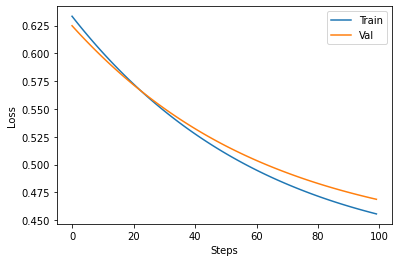

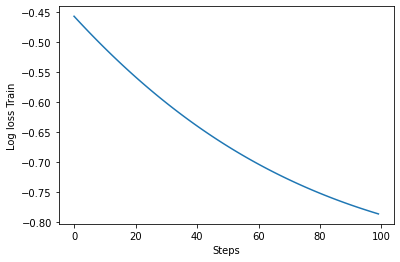

In [5]:
plt.plot(train_losses_gd)
plt.plot(val_losses_gd)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.show()

plt.plot(np.log(train_losses_gd))
plt.xlabel('Steps')
plt.ylabel('Log loss Train')
plt.show()

(d) Nesterov’s Acceleration

In [6]:
train_losses_nag, val_losses_nag = process(mode='NAG')

0 [0.6333513] [0.62481319]
1 [0.62985152] [0.62177902]
2 [0.62368198] [0.61643128]
3 [0.61558092] [0.60940167]
4 [0.60617094] [0.60122613]
5 [0.59595801] [0.59233788]
6 [0.5853404] [0.58309033]
7 [0.57462494] [0.57375195]
8 [0.56404054] [0.56452065]
9 [0.553752] [0.55554784]
10 [0.54387404] [0.54693454]
11 [0.53448122] [0.53875509]
12 [0.52562013] [0.53104637]
13 [0.51731218] [0.52383039]
14 [0.50956323] [0.51711269]
15 [0.50236817] [0.51088088]
16 [0.4957098] [0.50511508]
17 [0.48956587] [0.49979131]
18 [0.48390953] [0.49488069]
19 [0.47871115] [0.49035661]
20 [0.47394336] [0.48619448]
21 [0.46958013] [0.48237087]
22 [0.46559498] [0.4788645]
23 [0.46195895] [0.47564897]
24 [0.45864242] [0.47270303]
25 [0.45562] [0.4700067]
26 [0.4528679] [0.46753795]
27 [0.45036225] [0.46527795]
28 [0.44807805] [0.46320666]
29 [0.44599238] [0.46130555]
30 [0.44408594] [0.4595578]
31 [0.44233994] [0.45794361]
32 [0.44073512] [0.45644641]
33 [0.43925519] [0.45505481]
34 [0.43788568] [0.45375917]
35 [0.4

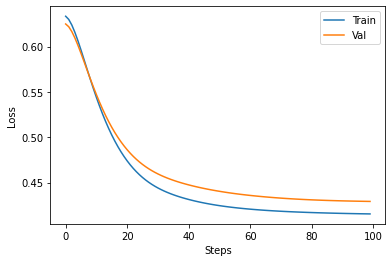

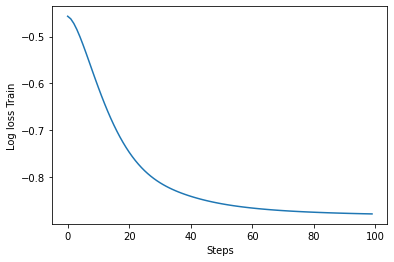

In [7]:
plt.plot(train_losses_nag)
plt.plot(val_losses_nag)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.show()

plt.plot(np.log(train_losses_nag))
plt.xlabel('Steps')
plt.ylabel('Log loss Train')
plt.show()

(e) Stochastic Gradient Descent (SGD)

In [8]:
def shuffle_dataset(X, Y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    return X[indices], Y[indices]

In [9]:
def process1(mode='GD'):

    np.random.seed(1)
    # mode 'GD' or 'NAG'
    stochastic = True # True or False
    lmd = 0.0001
    lr = 1e-3 if stochastic else 0.0005
    num_iter = 100
    rho = 0.80
    minibatch = 128
    decay_rate = lr / num_iter

    # load dataset
    train = thv.datasets.MNIST('./', download=True, train=True)
    val = thv.datasets.MNIST('./', download=True, train=False)

    trainXdataset, trainYdataset = subsample(dataset=train)
    valXdataset, valYdataset = subsample(dataset=val)

    W = np.random.normal(loc=0.0, scale=1.0, size=[28*28+1, 1])
    W_old = copy.deepcopy(W)

    train_losses, val_losses = [], []
    num_batches = int(trainXdataset.shape[0]//minibatch) if stochastic else 1

    for iter in range(num_iter):
        batch_train_losses, batch_val_losses = [], []
        
        if stochastic:
            trainXdataset, trainYdataset = shuffle_dataset(trainXdataset, trainYdataset)

        for batch in range(1):
            
            if stochastic:
                trainX = trainXdataset[minibatch * batch: minibatch * (batch + 1)]
                trainY = trainYdataset[minibatch * batch: minibatch * (batch + 1)]
            else:
                trainX, trainY = trainXdataset, trainYdataset

            valX, valY = valXdataset, valYdataset

            exp = np.exp(-trainYdataset * np.matmul(trainXdataset, W))
            train_loss = np.mean(np.log(1 + exp), axis=0) + (lmd * (sum(W ** 2)) / 2)

            val_loss = np.mean(np.log(1 + np.exp(-valY * np.matmul(valX, W))), axis=0) + (lmd * (sum(W ** 2)) / 2)
            exp = np.exp(-trainY * np.matmul(trainX, W))
            if mode == 'NAG':
                momentum = (1 + rho) * W - rho * W_old
                n_exp = np.exp(-trainY * np.matmul(trainX, momentum))
                train_grad = -(trainX.T.dot(trainY * n_exp / (1 + n_exp)))/trainX.shape[0] + lmd * momentum

                W_old = copy.deepcopy(W)
                W = momentum - (lr)* train_grad


            elif mode == 'GD':
                train_grad = -(trainX.T.dot(trainY * exp / (1 + exp)))/trainX.shape[0] + lmd * W
                W = W - (lr/(1+iter)) * train_grad
            
            #if stochastic:
            #    lr *= (1. / (1. + decay_rate * (1 + iter)))

            batch_train_losses.append(train_loss)
            batch_val_losses.append(val_loss)

        train_losses.append(np.mean(batch_train_losses))
        val_losses.append(np.mean(batch_val_losses))

        print(iter, np.mean(batch_train_losses), np.mean(batch_val_losses))
        print('lr {}'.format(lr))
    return train_losses, val_losses
        


In [10]:
train_losses_nag_sgd, val_losses_nag_SGD = process1(mode='NAG')


0 0.6333512973422957 0.6248131914421117
lr 0.001
1 0.6329533967474186 0.6244279740801456
lr 0.001
2 0.6321601510464225 0.6236610042125265
lr 0.001
3 0.6311855793739582 0.6226698417630883
lr 0.001
4 0.6298989031006516 0.6213931849234128
lr 0.001
5 0.6283872319852856 0.6199116978751718
lr 0.001
6 0.6267383588463492 0.6182383646246892
lr 0.001
7 0.6249388712713877 0.6164227517359928
lr 0.001
8 0.622966260916044 0.6144181586001781
lr 0.001
9 0.6208662073095437 0.6122729639060959
lr 0.001
10 0.6188267458556569 0.6101707585352695
lr 0.001
11 0.6168029733618566 0.6081078148129906
lr 0.001
12 0.6147387203466687 0.6059923761142136
lr 0.001
13 0.6126617921859119 0.6038510950752556
lr 0.001
14 0.6106116861557374 0.6017031359954517
lr 0.001
15 0.6086066859439697 0.5995510107206155
lr 0.001
16 0.6065155733067834 0.5973491296081243
lr 0.001
17 0.6045955417454844 0.5953457707335038
lr 0.001
18 0.6025837307671688 0.5932915628454073
lr 0.001
19 0.6004835837631145 0.5911641842570727
lr 0.001
20 0.598396

In [11]:
train_losses_sgd, val_losses_SGD = process1(mode='GD')

0 0.6333512973422957 0.6248131914421117
lr 0.001
1 0.6329533967474186 0.6244279740801456
lr 0.001
2 0.6327155004822396 0.6241981894278692
lr 0.001
3 0.6326015013337014 0.6240716935932339
lr 0.001
4 0.6324735589433599 0.6239496571323904
lr 0.001
5 0.6323755742597035 0.6238562230784814
lr 0.001
6 0.6323009328148286 0.6237734446691925
lr 0.001
7 0.6322304451815298 0.6237034884491583
lr 0.001
8 0.6321615689336005 0.6236321990921952
lr 0.001
9 0.6321011202455065 0.6235695648551273
lr 0.001
10 0.632063349805213 0.6235290546887766
lr 0.001
11 0.6320254105449107 0.6234921864245418
lr 0.001
12 0.6319860943723692 0.623451241948907
lr 0.001
13 0.6319508417578119 0.6234141033414016
lr 0.001
14 0.6319207981537239 0.623380606037605
lr 0.001
15 0.6318943610237647 0.6233493526833775
lr 0.001
16 0.6318610307006859 0.6233164108482123
lr 0.001
17 0.6318446308240275 0.6233003283008163
lr 0.001
18 0.6318156651877378 0.6232727519159985
lr 0.001
19 0.6317871142129383 0.6232445957559621
lr 0.001
20 0.63176400

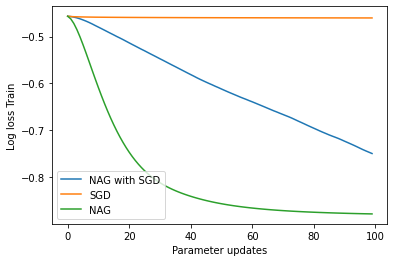

In [12]:
plt.plot(np.log(train_losses_nag_sgd))
plt.plot(np.log(train_losses_sgd))
plt.plot(np.log(train_losses_nag))
plt.xlabel('Parameter updates')
plt.ylabel('Log loss Train')
plt.legend(['NAG with SGD', 'SGD', 'NAG'])
plt.show()